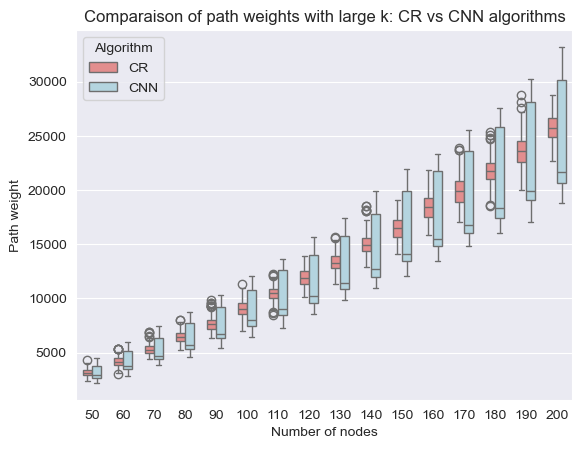

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataFrame = pd.read_csv('large_k50graph.csv')

plt.figure()
sns.boxplot(
    x="number of nodes",
    y="weight",
    hue="algorithm",
    data=dataFrame,
    palette={ "CR": "lightcoral", "CNN": "lightblue" },
    width=0.6
)

plt.title("Comparaison of path weights with large k: CR vs CNN algorithms")
plt.xlabel("Number of nodes")
plt.ylabel("Path weight")
plt.legend(title="Algorithm")

plt.show()

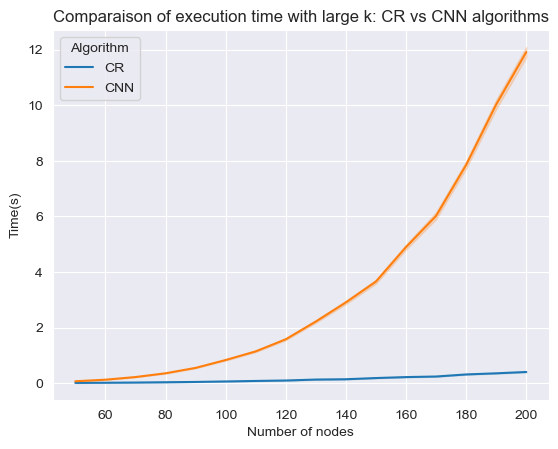

In [5]:
fig1, ax1 = plt.subplots()

sns.lineplot(
    data=dataFrame,
    x='number of nodes',
    y='run time',
    hue='algorithm',
    ax=ax1
)

ax1.set_title("Comparaison of execution time with large k: CR vs CNN algorithms")
ax1.set_xlabel("Number of nodes")
ax1.set_ylabel("Time(s)")
ax1.legend(title="Algorithm")  

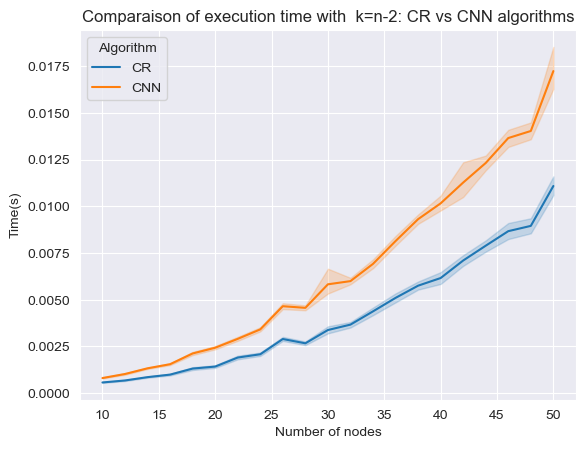

In [15]:
dataFrame = pd.read_csv('fix_k_vary_n50graph.csv')

fig2, ax2 = plt.subplots()

sns.lineplot(
    data=dataFrame,
    x='number of nodes',
    y='run time',
    hue='algorithm',
    ax=ax2
)
ax2.set_title("Comparaison of execution time with  k=n-2: CR vs CNN algorithms")
ax2.set_xlabel("Number of nodes")
ax2.set_ylabel("Time(s)")
ax2.legend(title="Algorithm")  

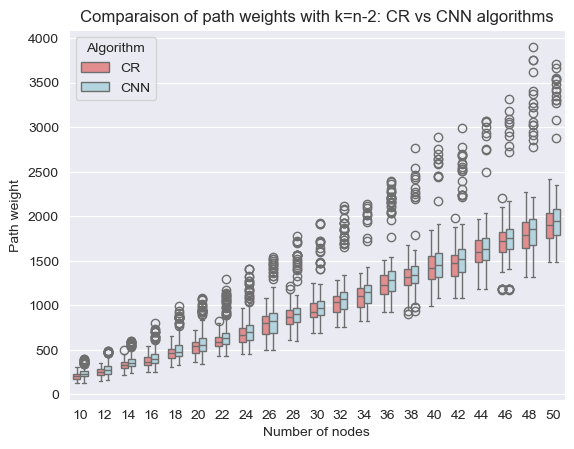

In [16]:
plt.figure()
sns.boxplot(
    x="number of nodes",
    y="weight",
    hue="algorithm",
    data=dataFrame,
    palette={ "CR": "lightcoral", "CNN": "lightblue" },
    width=0.6
)

plt.title("Comparaison of path weights with k=n-2: CR vs CNN algorithms")
plt.xlabel("Number of nodes")
plt.ylabel("Path weight")
plt.legend(title="Algorithm")

plt.show()

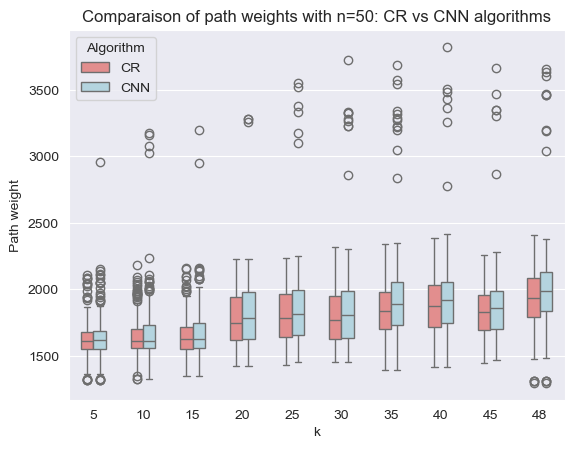

In [11]:
dataFrame = pd.read_csv('fix_n_vary_k50graph.csv')

plt.figure()
sns.boxplot(
    x="k",
    y="weight",
    hue="algorithm",
    data=dataFrame,
    palette={ "CR": "lightcoral", "CNN": "lightblue" },
    width=0.5
)

plt.title("Comparaison of path weights with n=50: CR vs CNN algorithms")
plt.xlabel("k")
plt.ylabel("Path weight")
plt.legend(title="Algorithm")

plt.show()

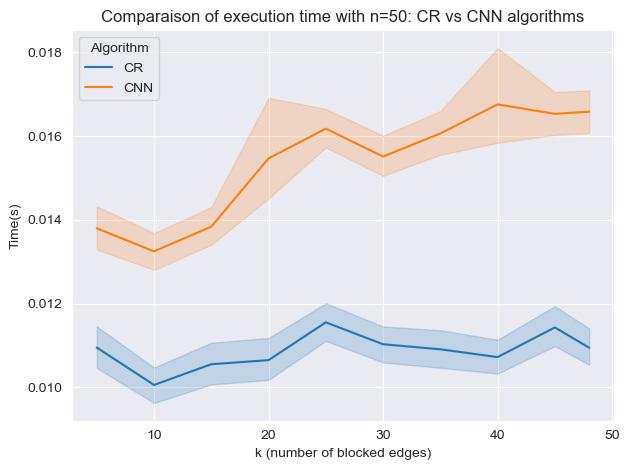

In [13]:
fig3, ax3 = plt.subplots()

sns.lineplot(
    data=dataFrame,
    x='k',
    y='run time',
    hue='algorithm',
    ax=ax3
)

plt.title("Comparaison of execution time with n=50: CR vs CNN algorithms")
plt.xlabel("k (number of blocked edges)")
plt.ylabel("Time(s)")
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()